# The driving factors for national CO2 emissions worldwide

## Contents

* [Background](#section-one)
* [Libraries used](#section-two)
* [Evaluation Metric](#section-three)
* [Factors to be examined](#section-four)
* [Data collected overview](#section-five)
* [Discussion](#section-six)
* [Conclusions](#section-seven)



<a id="section-one"></a>
##  Background

A greenhouse gas (GHG) is any gaseous compound that is capable of absorbing and emitting infrared radiation, thereby allowing less heat to escape back to space, 'trapping' it in the lower atmosphere and contributing towards the ongoing climate change. The major greenhouse gases in Earth's atmosphere are water vapor, carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O) and ozone (O3).

Global CO2 emissions have risen dramatically since the start of the industrial revolution. In 2021, CO2 emitted from energy combustion and industrial processes reached 36.3 gigatonnes (Gt), its highest ever annual level. Fossil fuel use is the primary source of CO2, but it is also emitted from direct human-induced impacts on forestry and other land use, such as through deforestation, land clearing for agriculture, and degradation of soils.

This project aims to investigate the correlation between know factors (as those are found in literature) and CO2 emissions worldwide, using the R programming language.

<a id="section-two"></a>
## Libraries used

In [1]:
#Import the libraries to be used

library(tidyverse)
library(janitor)
library(ggpubr)
library(GGally)
library(ggcorrplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



<a id="section-three"></a>
## Evaluation Metric

### CO2 emissions (kt)

Carbon dioxide emissions, largely by-products of energy production and use, account for the largest share of greenhouse gases, which are associated with global warming. Anthropogenic carbon dioxide emissions result primarily from fossil fuel combustion and cement manufacturing. The unit of measurement is kt (kiloton) (*Source of data: World Bank*).

(ref:foo) Define a text reference **here**. 

In [2]:
# Upload the Carbon Emissions database

carbon_emissions_raw <- read_csv("/kaggle/input/carbon-emissions-world-bank/Carbon Emissions - World Bank.csv", skip = 4)

carbon_emissions_raw <- clean_names(carbon_emissions_raw)

country_iso_codes <- clean_names(read_csv("/kaggle/input/iso-country-codes-global/wikipedia-iso-country-codes.csv"))

carbon_emissions <- carbon_emissions_raw %>%
  right_join(country_iso_codes, by = c("country_code" = "alpha_3_code")) %>%
  select("country_name", "country_code", "x2014")  %>%
  rename("carbon_emissions" = "x2014") %>%
  arrange(desc(carbon_emissions))

head(carbon_emissions)

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (30): 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, ...
lgl (33): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 246 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): English short name lower case, Alpha-2 code, Alpha-3 code, ISO 3166-2
dbl (1): Numeric code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_name       country_code carbon_emissions
1 China              CHN          10006670        
2 United States      USA           5107210        
3 India              IND           2147110        
4 Russian Federation RUS           1611960        
5 Japan              JPN           1217120        
6 Germany            DEU            736010

Let's visualise the CO2 dataset to get an overview of the data. We'll use the map_data() function.

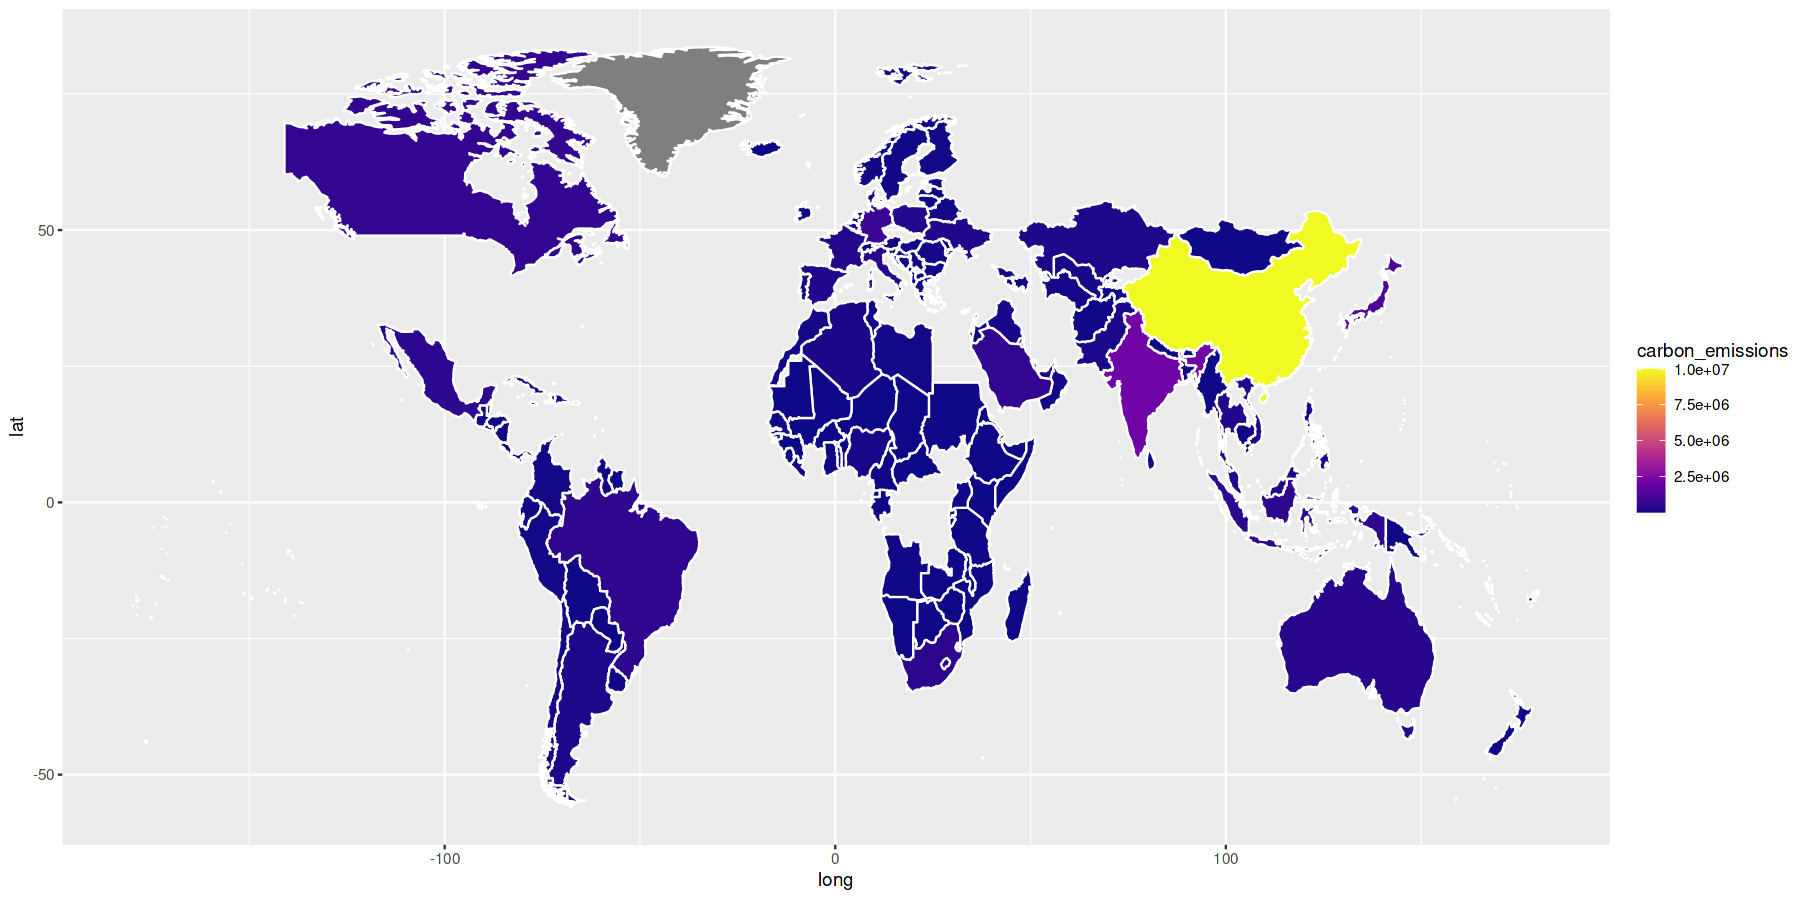

In [3]:
world_map <- map_data("world")
carbon_em_map <- left_join(carbon_emissions, world_map, by = c("country_name" = "region"))

options(repr.plot.width = 15, repr.plot.height = 7.5)

ggplot(carbon_em_map, aes(x = long, y = lat, group = group)) +
  geom_polygon(aes(fill = carbon_emissions ), color = "white")+
  scale_fill_viridis_c(option = "C", direction = 1)

As can be noticed, the "world" dataframe has many discrepancies in the naming of countries compared to our carbon database.
We will therefore use the [world_map2 database created by Thomas Joseph Haslam](https://github.com/Thom-J-H/map_Gap_2_Tidy).

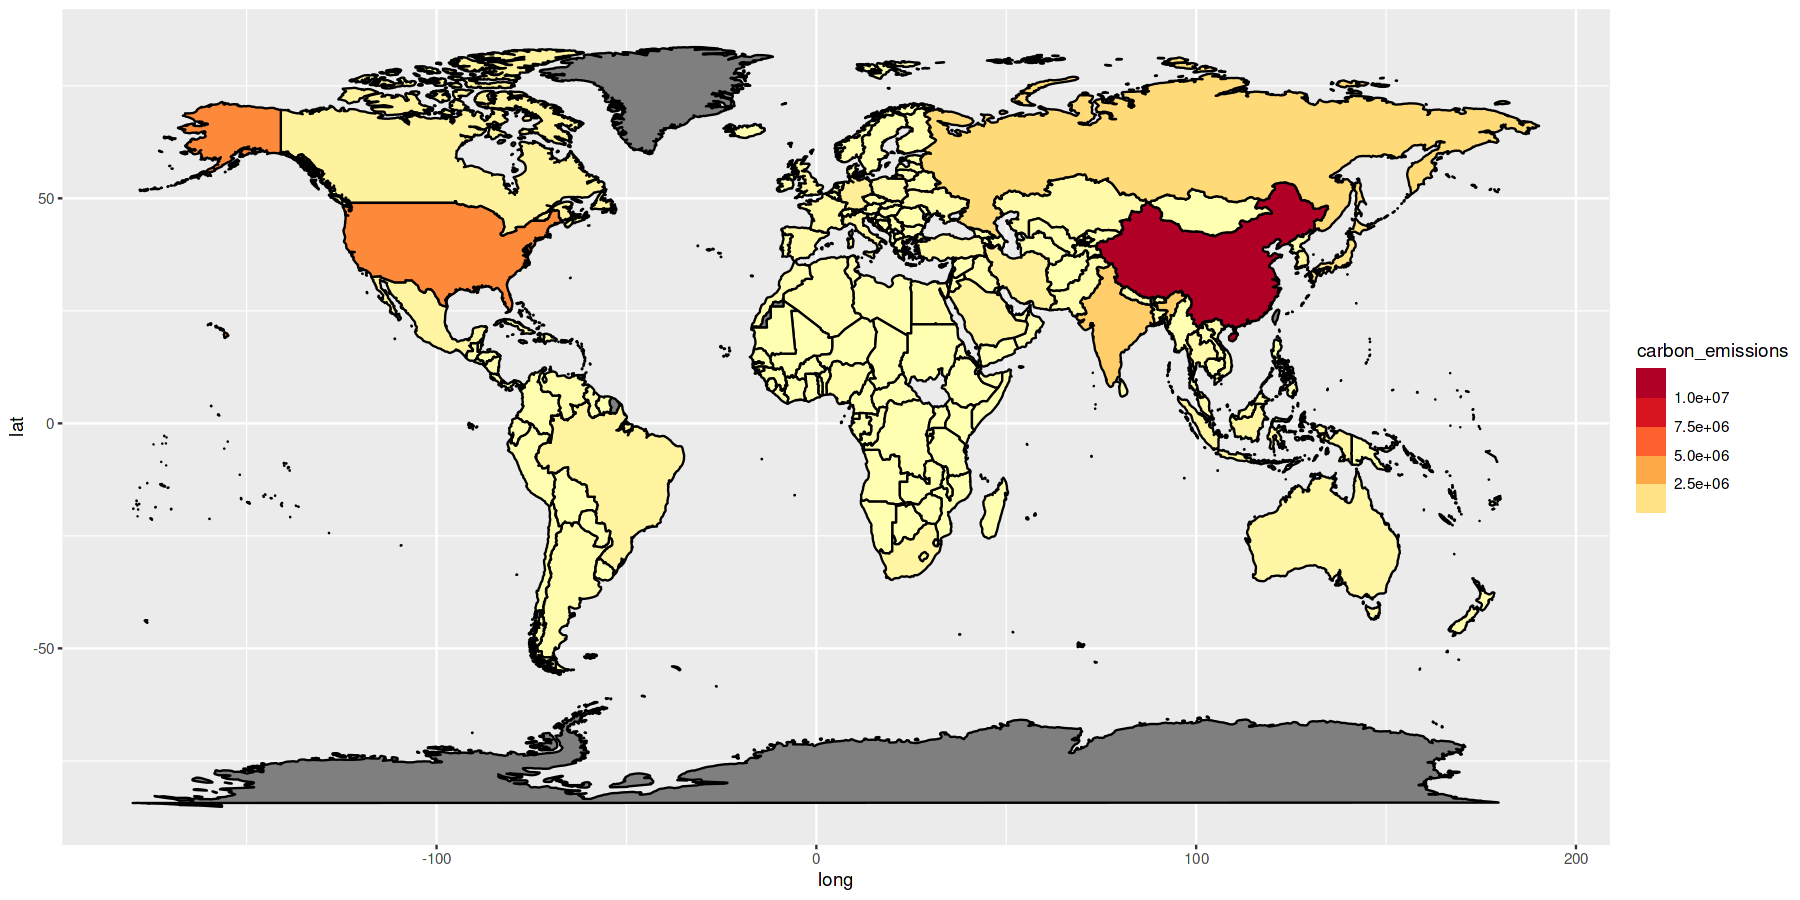

In [4]:
load(file="/kaggle/input/world-map-2-project/world_map2_project.rda")

world_map <- map_data("world")
carbon_em_map <- left_join(carbon_emissions, world_map2, by = c("country_code" = "code_3"))

options(repr.plot.width = 15, repr.plot.height = 7.5)

ggplot(carbon_em_map, aes(x = long, y = lat, group = group)) +
  geom_polygon(aes(fill = carbon_emissions ), color = "black")+
  scale_fill_distiller(
    type = "seq",
    palette = "YlOrRd",
    direction = 1,
    values = NULL,
    space = "Lab",
    na.value = "grey50",
    guide = "coloursteps",
    aesthetics = "fill"
 )

There are still some countries missing (e.g. South Sudan), however map is good enough for us to get a picture of the distribution of CO2 emission worldwide.

<a id="section-four"></a>
## Factors to be examined

A number of factors highly correlated with national CO2 emissions worldwide according to literature [[1](https://www.frontiersin.org/articles/10.3389/fenvs.2021.721517/full), [2](https://openknowledge.worldbank.org/handle/10986/29930), [3](https://www.sciencedirect.com/science/article/abs/pii/S0264999318312951#:~:text=In%20this%20paper%2C%20we%20identify,carbon%20dioxide%20emission%20across%20time.)] are examined:

1. Foreign Direct Investment
2. Population 
3. Urban population
4. Fossil Fuel Energy Consumption
5. Power consumption
6. Meat consumption
7. Gross Domestic Product (GDP)
8. Inland Transport Mode

In addition, we will examine the following factors that are indicative of technological progress:

1. Renewable Energy Production
2. Business R&D Innovation
3. Number of patents

As all 11 factors are in general linked with the level of development, we expect high correlations with CO2 emissions, without necessarily indicating causation. For example, highly-developed countries are expected to have high carbon emissions but also be pioneers in R&D Innovation.

### Foreign Direct Investment
FDI positions represent the value of the stock of direct investments held at the end of a reference period for a country (*Source of data: FDI positions, main aggregates (https://stats.oecd.org/Index.aspx?DataSetCode=FDI_POS_AGGR)*.



In [5]:
# Upload the Foreign Investment database

foreign_investment_raw <- read_csv("/kaggle/input/fdi-positions-worldwide-main-aggregates/FDI_AGGR_SUMM_25012023110354972.csv")

foreign_investment_raw <- clean_names(foreign_investment_raw)

foreign_investment <- foreign_investment_raw %>%
right_join(country_iso_codes, by = c("cou" = "alpha_3_code")) %>%
filter(time == "2014" & 
       measure_principle == "DI" & 
       type_of_fdi == "FDI positions -Total" &
       measure_2 == "US Dollar") %>%
select("cou","value") %>%
arrange(desc(value))

head(foreign_investment)

Rows: 77220 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): COU, Reporting country, MEASURE, Measure, MEASURE_PRINCIPLE, Measu...
dbl  (2): PowerCode Code, Value
lgl  (2): Reference Period Code, Reference Period

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cou value    
1 USA 5456888.0
2 CHN 2599102.0
3 GBR 1581493.7
4 NLD 1082511.8
5 CAN  994711.6
6 DEU  862229.0

### Country Population

This dataset provides have historical population data for every Country/Territory in the world by different parameters like Area Size, Name of the Continent, Density, etc. *(Source of data: [World Population Review
](https://worldpopulationreview.com/))*

In [6]:
world_population_raw <- read_csv("/kaggle/input/world-population-dataset/world_population.csv")

world_population_raw <- clean_names(world_population_raw)

world_population <- world_population_raw %>%
  select("cca3", "x2015_population") %>%
  arrange(desc(x2015_population))

head(world_population)

Rows: 234 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): CCA3, Country/Territory, Capital, Continent
dbl (13): Rank, 2022 Population, 2020 Population, 2015 Population, 2010 Popu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cca3 x2015_population
1 CHN  1393715448      
2 IND  1322866505      
3 USA   324607776      
4 IDN   259091970      
5 PAK   210969298      
6 BRA   205188205

### Urban Population by Country

The dataset contains data for urban population total (in people) and % of total population for years 1960-2020 *(Source: [World Bank](https://data.worldbank.org/indicator/SP.URB.TOTL))*

In [7]:
urban_pop_raw <- clean_names(read_csv("/kaggle/input/urban-population-19602021-by-country/urban_total.csv"))

urban_pop <- urban_pop_raw %>%
  right_join(country_iso_codes, by = c("country_code" = "alpha_3_code")) %>%
  select("country_code", "x2014") %>%
  arrange(desc(x2014))

head(urban_pop)

New names:
• `` -> `...66`
Rows: 266 Columns: 66
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (61): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (1): ...66

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_code x2014    
1 CHN          744357517
2 IND          419567353
3 USA          259430732
4 BRA          173346780
5 IDN          134286663
6 JPN          116208079

### Fossil Fuel Energy Consumption

Fossil fuel consumption per capita is measured as the average consumption of energy from coal, oil and gas per person, here provided as % of total *(Source: [World Bank](https://data.worldbank.org/indicator/EG.USE.COMM.FO.ZS))*

In [8]:
# Upload the Fossil Fuel Energy Consumption % of total

fossil_fuel_ratio_raw <- read_csv("/kaggle/input/fossil-fuel-energy-consumption-of-total/API_EG.USE.COMM.FO.ZS_DS2_en_csv_v2_4770651.csv", skip = 4)

fossil_fuel_ratio_raw <- clean_names(fossil_fuel_ratio_raw)

fossil_fuel <- fossil_fuel_ratio_raw %>%
  right_join(country_iso_codes, by = c("country_code" = "alpha_3_code")) %>%
  inner_join(world_population, by = c("country_code" = "cca3")) %>%
  mutate(fossil_fuel_total = x2014 * x2015_population / 1000000) %>%
  select("country_code", "fossil_fuel_total") %>%
  arrange(desc(fossil_fuel_total))

head(fossil_fuel)

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (56): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (7): 2016, 2017, 2018, 2019, 2020, 2021, ...67

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_code fossil_fuel_total
1 CHN          122187.63        
2 IND           97332.52        
3 USA           26971.35        
4 IDN           17123.25        
5 RUS           13330.16        
6 PAK           12992.62

### Power consumption

This database contains kWh of power consumed per capita for countries worldwide. We will therefore adjust the data points by multiplying by the population of each country, to get the total kWh of power consumed per country. We also divide by 10^6, so the unit used is GWh.

In [9]:
# Upload the Power consumption per capita database

power_consumption_raw <- read_csv("/kaggle/input/power-consumption-per-capita-worldwide/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_4771109.csv", skip=4)

power_consumption_raw <- clean_names(power_consumption_raw)

power_consumption <- power_consumption_raw %>%
  select("country_code", "x2014") %>%
  inner_join(world_population, by = c("country_code" = "cca3")) %>%
  mutate(power_total = x2014 * x2015_population / 1000000) %>%
  select(-c("x2014","x2015_population")) %>%
  arrange(desc(power_total))

head(power_consumption)

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (60): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (3): 2020, 2021, ...67

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_code power_total
1 CHN          5442901.5  
2 USA          4217942.3  
3 IND          1054786.6  
4 JPN           995066.0  
5 RUS           955195.8  
6 DEU           577424.8

### Renewable Energy Production

The renewable energy share in total final consumption provided in this database is the percentage of final consumption of energy that is derived from renewable resources *(Source: [OECD](https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS))*.

In [10]:
renewable_energy_cons <- clean_names(read_csv("/kaggle/input/renewable-energy-consumption-ratio-worldwide/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_4772680.csv", skip = 4)) %>%
  select(country_code, x2014) %>%
  rename (renewable_ratio = x2014) %>%
  left_join(power_consumption, by = "country_code") %>%
  mutate(renew_energy_t = renewable_ratio/100 * power_total) %>%
  select(country_code, renew_energy_t) %>%
  arrange(desc(renew_energy_t))

head(renewable_energy_cons)

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (30): 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, ...
lgl (33): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_code renew_energy_t
1 CHN          649882.44     
2 USA          388894.28     
3 IND          357045.26     
4 BRA          223459.76     
5 CAN          125271.50     
6 DEU           80954.95

### Meat consumption

This indicator provides kg of consumption per capita for four types of meat: beef, lamb, poultry and pork (Source: [OECD](https://data.oecd.org/agroutput/meat-consumption.htm)), which we'll convert to one value, based on the carbon intensity of each.

Carbon emissions for the production of meat differ around the globe. In this case, we will use the following values as part of this project (Source: [Our World in Data](https://ourworldindata.org/food-choice-vs-eating-local)), however further research would be needed to get more acurate data:
- Beef: 60 kgCO2 equivalent per kg product
- Lamb: 24 kgCO2 equivalent per kg product
- Poultry: 6 kgCO2 equivalent per kg product
- Pork: 7 kgCO2 equivalent per kg product

Each value will then multiplied by each country's population, and divided by 10^9 to get Mt of meat consumption for the population of each country.

In [11]:
# Upload the meat consumption dataset

meat_consumption_raw <- read_csv("/kaggle/input/meat-consumption-per-capita-worldwide/DP_LIVE_20012023094519504 - Food Consumption by Type.csv")

calc1 <- function(d1, t1, h1, p1){
  (60 * sum(d1) + 7 * sum(t1) + 6 * sum(h1) + 24 * sum(p1)) }

meat_consumption <- meat_consumption_raw %>%
  filter(TIME == 2014) %>%
  pivot_wider(names_from = SUBJECT, values_from = Value) %>%
  clean_names() %>%
  replace(is.na(.), 0) %>%
  group_by(location) %>% 
  summarise(val= 53 * sum(beef) + 11 * sum(pig) + 10 * sum(poultry) + 27 * sum(sheep)) %>%
  inner_join(world_population, by = c("location" = "cca3")) %>%
  mutate(food_co2_total = val * x2015_population / 10^9) %>%
  select(location, food_co2_total) %>%
  arrange(desc(food_co2_total))

head(meat_consumption)

Rows: 12160 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): LOCATION, INDICATOR, SUBJECT, MEASURE, FREQUENCY
dbl (2): TIME, Value
lgl (1): Flag Codes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


location food_co2_total
1 CHN      1792563.34    
2 USA       278761.42    
3 IND       116422.18    
4 BRA       109137.29    
5 RUS        31763.34    
6 PAK        23306.86

### Gross Domestic Product (GDP)

Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. Here, it is provided in USD *(Source: World Bank)*.

In [12]:
# Upload the GDP dataset

gdp_raw <- read_csv("/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp.csv")

gdp_raw <- clean_names(gdp_raw)

gdp <- gdp_raw %>%
  right_join(country_iso_codes, by = c("code" = "alpha_3_code")) %>%
  select(code, x2014)  %>%
  arrange(desc(x2014))

head(gdp)

Rows: 266 Columns: 64
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country Name, Code
dbl (61): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (1): Unnamed: 65

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


code x2014       
1 USA  1.752716e+13
2 CHN  1.047568e+13
3 JPN  4.896994e+12
4 DEU  3.883920e+12
5 GBR  3.087166e+12
6 FRA  2.852166e+12

### R&D expenditure

This indicator measures Public R&D expenditures (per GDP) *(Source [OEDC](https://stats.oecd.org/Index.aspx?DataSetCode=BENCHMARK_STIO))*.

In [13]:
# Upload the Business R&D Innovation

rd_exp_raw <- read_csv("/kaggle/input/public-rd-expenditures-per-country-worldwide/BENCHMARK_STIO_31012023082517463.csv")

rd_exp_raw <- clean_names(rd_exp_raw)

rd_exp <- rd_exp_raw %>%
  filter(indicator_2 == "Public R&D expenditures (per GDP)") %>%
  left_join(gdp, by = c("location" = "code")) %>%
  mutate(total_rd = value * x2014 / 10^9)  %>%
  select("location","total_rd") %>%
  arrange(desc(total_rd))

head(rd_exp)

Rows: 988 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): LOCATION, Country, INDICATOR, Indicator, TIME, Time, Flag Codes, Flags
dbl (1): Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


location total_rd 
1 USA      1790986.3
2 CHN       577174.8
3 DEU       573188.1
4 JPN       481502.7
5 FRA       368718.0
6 GBR       266271.6

### Number of patents

This metric provides the number of patents per country worldwide for all technologies *(Source: [OECD](https://stats.oecd.org/viewhtml.aspx?datasetcode=PAT_DIFF&lang=en))*.

In [14]:
patents_num <- clean_names(read_csv("/kaggle/input/patents-number-per-country-worldwide/PAT_DEV_20012023111939175 - Number of Patents.csv")) %>%
  filter(year == "2014" & dom == "TOT") %>%
  select("cou", "value") %>%
  rename(patents_tot = value) %>%
  arrange(cou)

Rows: 95921 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): COU, Inventor country, SIZE, Family size, DOM, Technology domain, ...
dbl  (4): YEA, Year, PowerCode Code, Value
lgl  (4): Reference Period Code, Reference Period, Flag Codes, Flags

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Air transport passengers
Provided by the [World Bank](https://data.worldbank.org/indicator/IS.AIR.PSGR), this database contains number of air transport passengers per country.

In [15]:
air_transport <- clean_names(read_csv("/kaggle/input/air-transport-passengers-carried/API_IS.AIR.PSGR_DS2_en_csv_v2_4770543.csv", skip = 4)) %>%
  select(country_code, x2014) %>%
  rename("air_transport" = "x2014")

head(air_transport)

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (51): 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, ...
lgl (12): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 2021, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_code air_transport
1 ABW                NA     
2 AFE          36350759     
3 AFG           2209428     
4 AFW           8030237     
5 AGO           1409952     
6 ALB            151632

<a id="section-five"></a>
## Data collected overview
### Creating a summary table

To merge our dataframes, we will choose a left join on the Carbon Emissions dataframe, as an inner join would limit the available data points join by join, and would eventually lead to unsufficient data for analysis in the later joins. The values of the various tibbles are all demicals (dbl data type) so no conversion is required.

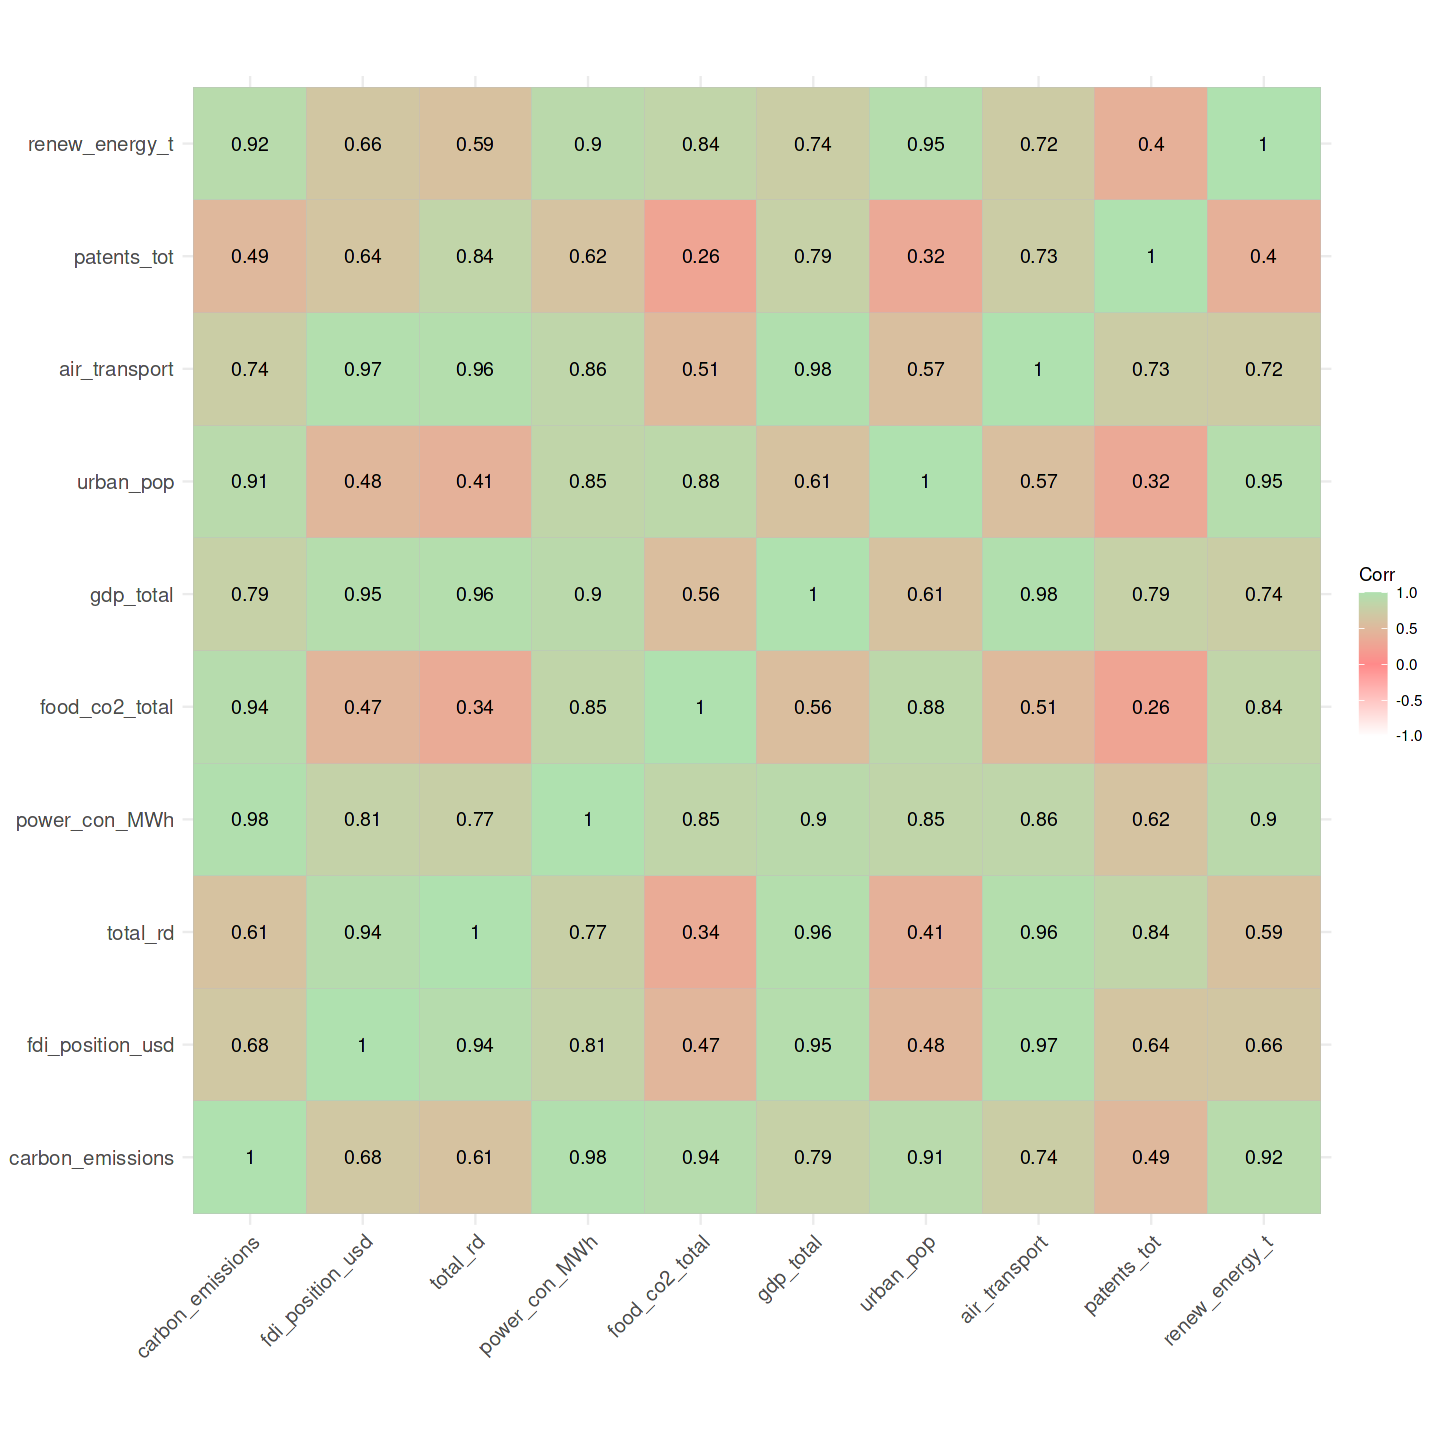

In [16]:
# Merge the tables

summary_table <- carbon_emissions %>% 
  left_join(foreign_investment %>% rename("fdi_position_usd" = "value"), by = c("country_code" = "cou")) %>%
  left_join(rd_exp, by = c("country_code" = "location")) %>%
  left_join(power_consumption %>% rename("power_con_ΜWh" = "power_total"), by = "country_code") %>%
  left_join(meat_consumption, by = c("country_code" = "location")) %>%
  left_join(gdp %>% rename("gdp_total" = "x2014"), by = c("country_code" = "code")) %>%
  left_join(urban_pop %>% rename("urban_pop" = "x2014"), by = "country_code") %>%
  left_join(air_transport, by = "country_code") %>%
  left_join(patents_num, by = c("country_code" = "cou")) %>%
  left_join(renewable_energy_cons, by = "country_code") %>%
  column_to_rownames(., var = 'country_code')

corr_matrix <- round(cor(summary_table[-c(1)], use="complete.obs"), digits = 3)

options(repr.plot.width = 12, repr.plot.height = 12)

ggcorrplot(corr_matrix, colors = c("white", "#FF8A8A", "#AFE1AF"), 
           lab = TRUE)

In [17]:
summary_table %>%  
  summarise_all(~ sum(is.na(.)))

country_name carbon_emissions fdi_position_usd total_rd power_con_ΜWh
1 34           56               202              204      107          
  food_co2_total gdp_total urban_pop air_transport patents_tot renew_energy_t
1 211            40        36        87            70          107

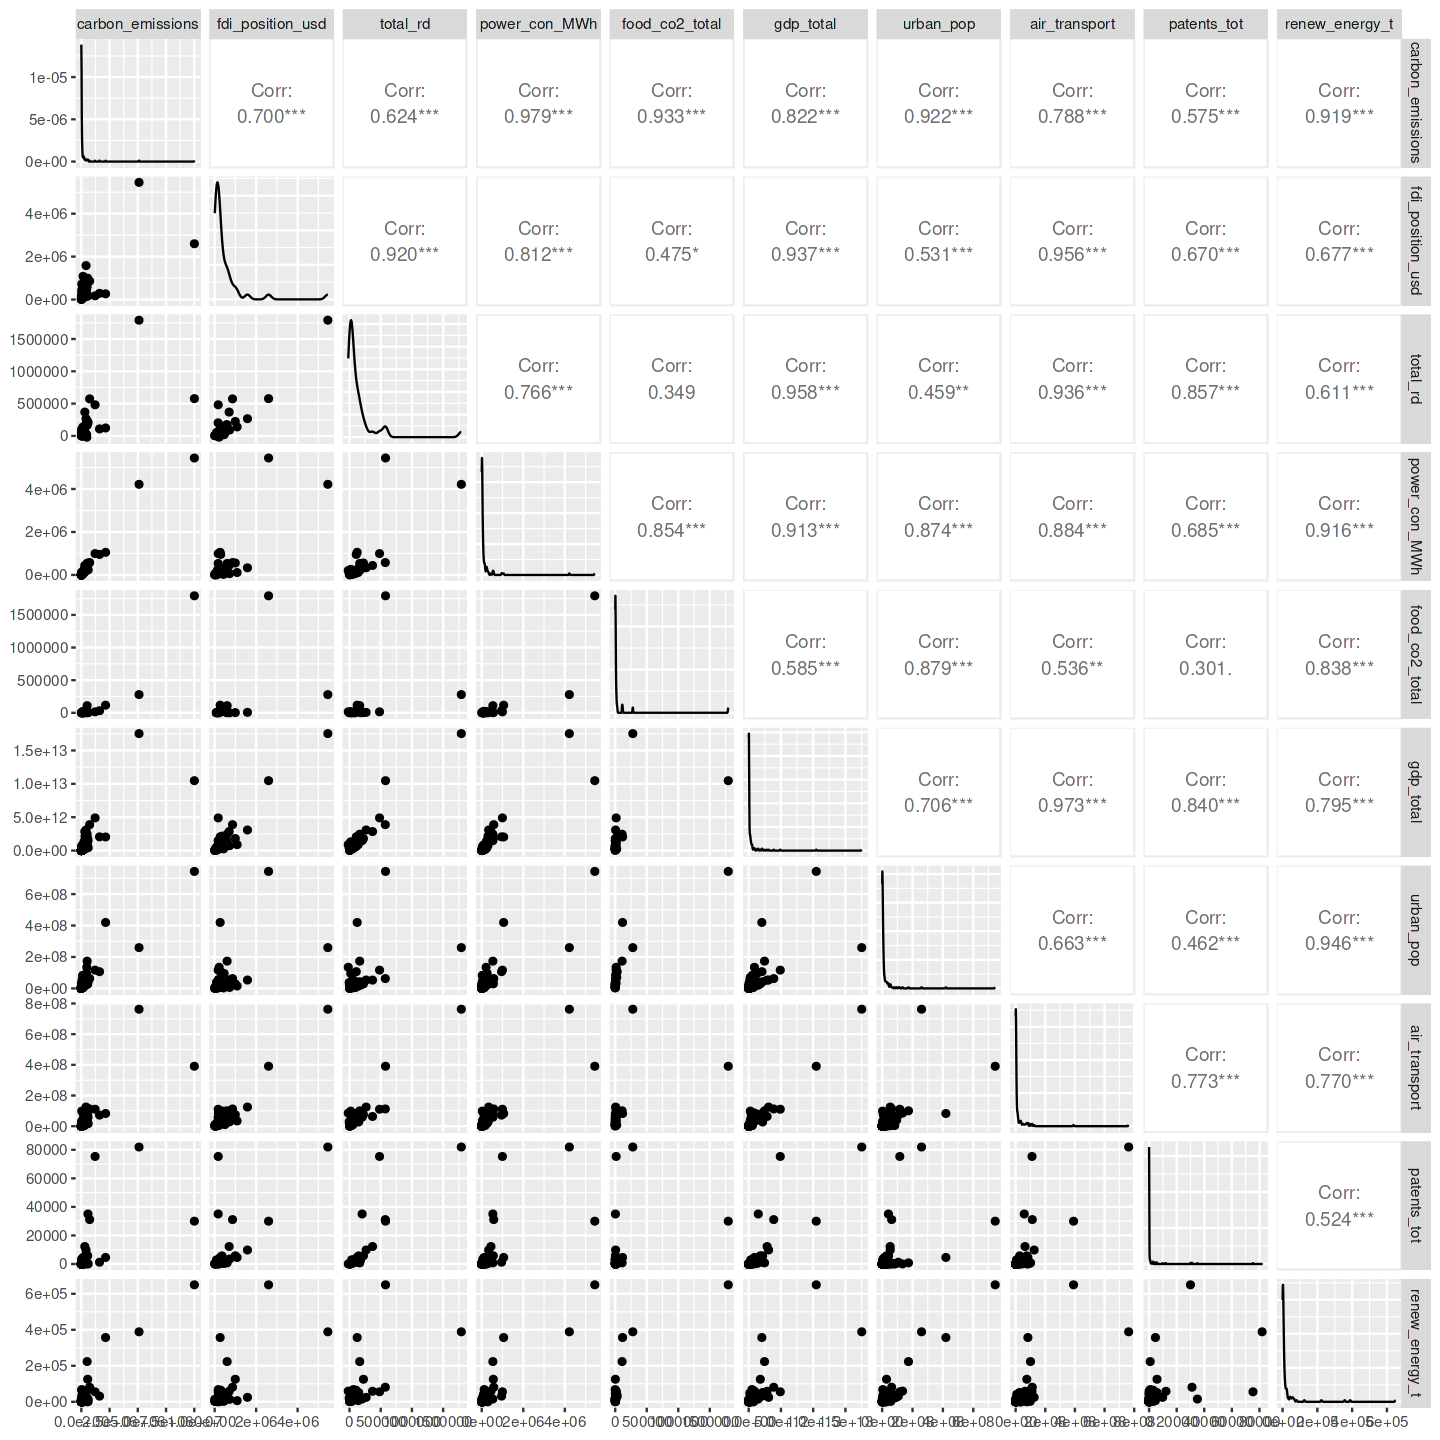

In [18]:
options(warn = - 1) 
ggpairs(summary_table[-c(1)])

<a id="section-six"></a>
## Discussion

### Exploring the results

The graph shows that the greatest correlation of CO2 emmited by country lies with the power consumed (r=0.979), followed by meat consumption (r=0.933) and urban population (r=0.922). The lowest correlation coefficient is that of patent number (r=0.575) and foreign direct investment (r=0.700).

Interestingly enough, there is a high correlation with the renewable energy production (r=0.919). This however does not necessarily prove causation; it could be explained by the fact that countries with high carbon emissions invest in renewable energy to offset them, thus also have increased renewable energy production. This remains the case even when we remove China, that appears to be an outlier:

`geom_smooth()` using formula = 'y ~ x'


country_name  carbon_emissions fdi_position_usd total_rd power_con_ΜWh
USA United States 5107210          5456888          1790986  4217942      
    food_co2_total gdp_total    urban_pop air_transport patents_tot
USA 278761.4       1.752716e+13 259430732 762710000     81948.23   
    renew_energy_t
USA 388894.3

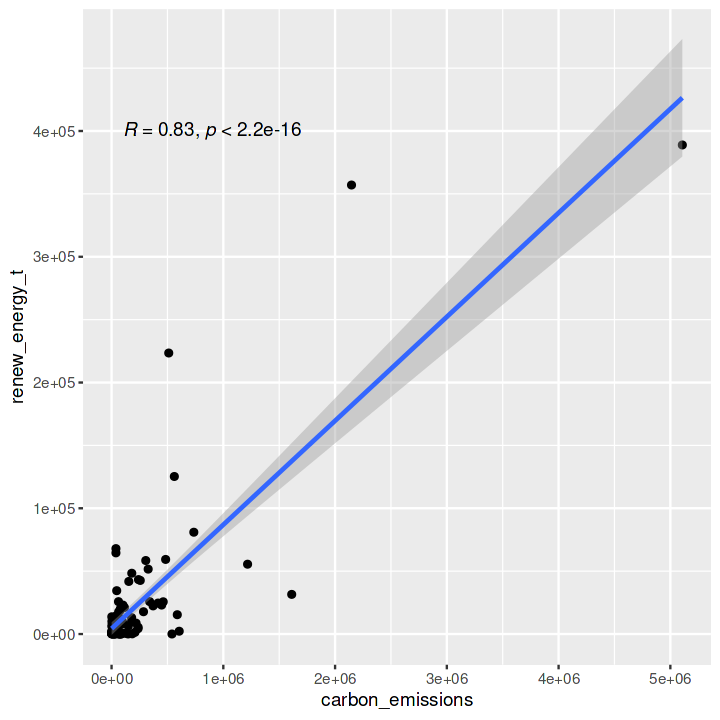

In [19]:
# Create a scatter plot

summary_table_no_chn <- filter(summary_table, rownames(summary_table) != 'CHN')

options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(summary_table_no_chn, aes(x=carbon_emissions, y=renew_energy_t)) + 
  geom_point() +
  geom_smooth(method=lm) +
  stat_cor(method = "pearson", label.x = 10^5, label.y = 4*10^5)

summary_table_no_chn %>%
  slice(which.max(renew_energy_t))

Let's also have a closer look at the CO2 and meat consumption relationship. Even after removing a likely outlier (China once again), the correlation remains very high (r=0.91).

`geom_smooth()` using formula = 'y ~ x'


country_name carbon_emissions fdi_position_usd total_rd power_con_ΜWh
CHN China        10006670         2599102          577174.8 5442901      
    food_co2_total gdp_total    urban_pop air_transport patents_tot
CHN 1792563        1.047568e+13 744357517 390878784     29989.39   
    renew_energy_t
CHN 649882.4

`geom_smooth()` using formula = 'y ~ x'


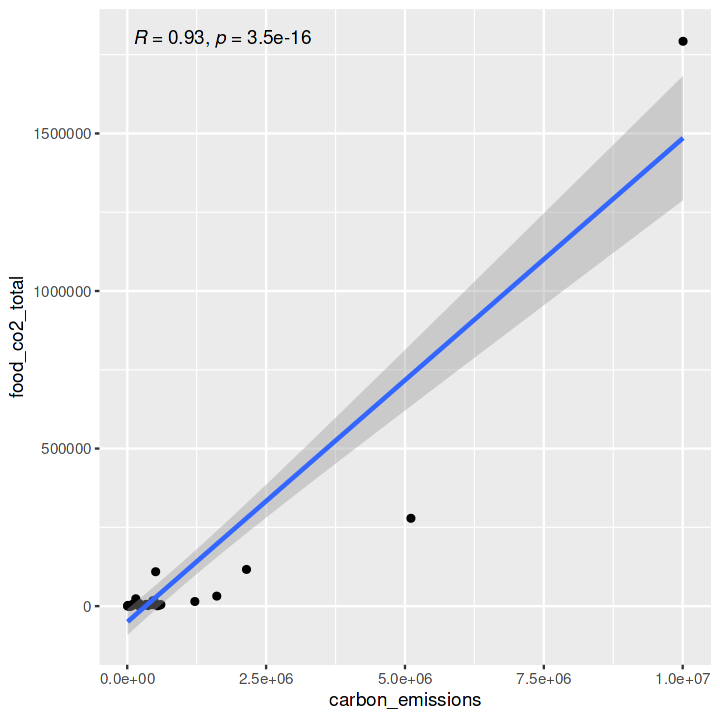

country_name  carbon_emissions fdi_position_usd total_rd power_con_ΜWh
USA United States 5107210          5456888          1790986  4217942      
    food_co2_total gdp_total    urban_pop air_transport patents_tot
USA 278761.4       1.752716e+13 259430732 762710000     81948.23   
    renew_energy_t
USA 388894.3

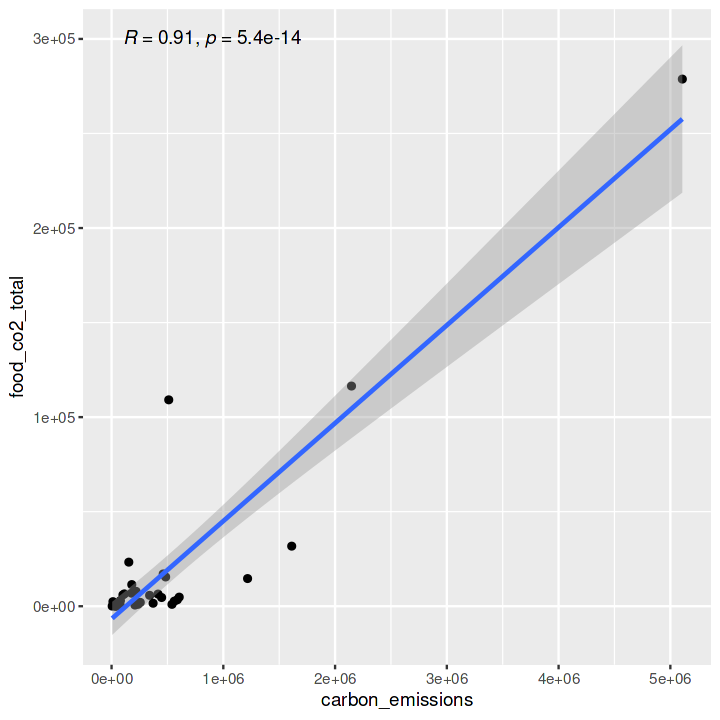

In [20]:
# Create a scatter plot

ggplot(summary_table, aes(x=carbon_emissions, y=food_co2_total)) + 
  geom_point() +
  geom_smooth(method=lm) +
  stat_cor(method = "pearson", label.x = 10^5, label.y = 1.8*10^6)

summary_table %>%
  slice(which.max(food_co2_total))

# Removing an outlier

ggplot(summary_table_no_chn, aes(x=carbon_emissions, y=food_co2_total)) + 
  geom_point() +
  geom_smooth(method=lm) +
  stat_cor(method = "pearson", label.x = 10^5, label.y = 3*10^5)

summary_table_no_chn %>%
  slice(which.max(power_con_ΜWh))

<a id="section-seven"></a>
## Conclusions

This short investigation has demonstrated that there is a significant positive correlation between CO2 emissions and the factors examined: Foreign Direct Investment, Population, Urban population, Fossil Fuel Energy Consumption, Power consumption, Meat consumption, Gross Domestic Product (GDP), Inland Transport Mode, Renewable Energy Production, Business R&D Innovation and Number of patents.
In order to investigate the type of correlation between the factors examined, testing hypotheses would be required, as well as building further knowledge and understanding on the subject.

literature suggests that [income and population](https://dergipark.org.tr/tr/download/article-file/361580) and [energy consumption](https://www.emerald.com/insight/content/doi/10.1108/MEQ-01-2022-0014/full/html?skipTracking=true) appear to have significant impact on CO2 emissions. There is also [causality from economic performance and population toward CO2 emissions](https://www.tandfonline.com/doi/full/10.1080/17583004.2018.1457930), a [unidirectional causality](https://www.researchgate.net/publication/321112607_Investigating_the_causal_relationship_between_non-renewable_and_renewable_energy_consumption_CO_2_emissions_and_economic_growth_in_Thailand_1_1This_is_a_preliminary_work_Please_do_not_quote_or_cite_wi) running from non-renewable energy consumption to CO2 emissions, a [bidirectional causal link](https://mpra.ub.uni-muenchen.de/97908/1/MPRA_paper_97908.pdf) between renewable energy consumption and environmental degradation.